# UNIVERSIDAD POLITÉCNICA SALESIANA 
# El VECINO - CUENCA

**Estudiante:** Gustavo Guallpa

**Profesor:** Ing. Diego Quisi

**Asignatura:** Simulación

**Fecha:** 04/11/2020.

**Tema:** Desarrollo del Modelo:COVID-19 ECUADOR

# DESARROLLO DEL MODELO

**1)Definición del sistema**

El desarrollo del Sistema se centra en el tema del COVID-19, de manera específica con las personas contagiadas,se implementará la regresion mediante ello poder ver cual de estos dos modelos es mejor para poder a fututo hacer un predicción de como va a evolucionar la pandemia.

**2)Formulación del modelo**

Como se específico en el punto anterior se emplear dos modelos de regresión.

**Regresión Lineal**

**Introducción al modelo**

La regresión lineal simple parte de una sóla variable predictora, es decir X=x1dondeX∈R y supone que existe aproximadamente una relación lineal entre X e Y. Esta relación lineal puede ser escrita como:



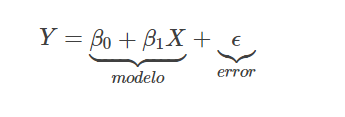

Los términos β0 y β1 representan respectivamente el interceptor(β0-ordenada en el origen ) y la pendiente(β1 ) del modelo lineal.

Una vez obtenida la estimación de estos dos coeficientes se puede predecir la variable Y usando X conocidos y a partir de la siguiente fórmula:

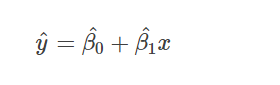


**Regresión Logística**


El modelo logístico se ha utilizado ampliamente para describir el crecimiento de una población. Una infección puede describirse como el crecimiento de la población de un agente patógeno, por lo que un modelo logístico parece razonable .
La expresión más genérica de una función logística es:

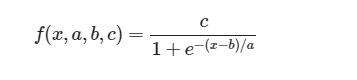

**3)Colección de datos**

Para la obtención de los datos se hizo una recolección que es propiamente realizada por el estudiante, se hizo en base a fuentes que se encuentran citadas en las referencias, los datos estan hasta la fecha de 30 de Octubre de 2020, toda la información se encuentra un archivo de nombre **covid19** con extensión .csv, cuenta con un total de 256 registros.


**4)Implementación del modelo en el ordenador**

En este apartado el Lenguaje de programación que se va a utilizar es Python, empelando las siguientes librerías.
- Pandas
- Numpy
- Sklearn
- Matplotlib
- otras muchas más.

**5)Verificación**

Verificar que cada una de las libreria para aplicar el modelo de regresión sean las correctas,mas que todo en el lógistico debido a que existen diferentes tipos dentro de este modelo de regresión.

**6)Diseño de experimentos**

Para escoger como el mejor modelo de regresón, vamos a trabjar con todo el conjunto de datos que se recopiló, vamos a ver aquel modelo en el que las recta o trazo tenga una mejor tendencias a los puntos  que se estan analizando y por lo tanto este trazo pueda en su mayoría cubrir la mayoría de los puntos.

**7)Experimentación**

Text(0, 0.5, 'Número Casos')

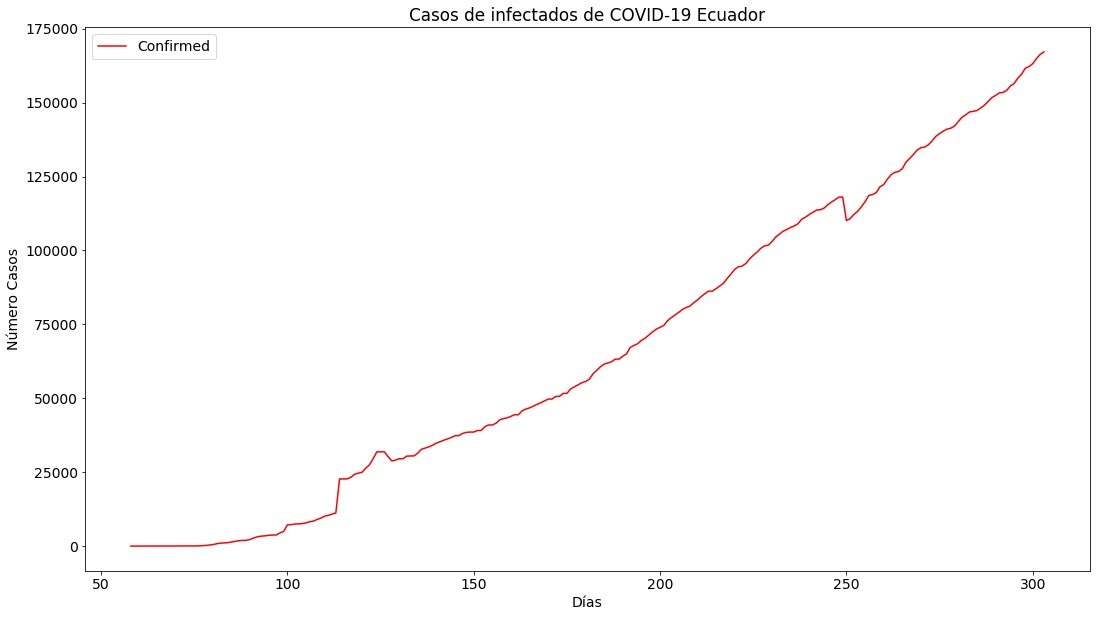

In [26]:
#Leemos los datos.
path='covid19.csv'
df=pd.read_csv(path)
#df.head(300)
#df
df = df.loc[:,['dateRep','Confirmed']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['dateRep']
df['dateRep'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
#df
# Represento los datos generados
plt.rcParams['figure.figsize'] = [18, 10]
ax = df.plot(x ='dateRep', y='Confirmed',color='red',title='Casos de infectados de COVID-19 Ecuador')
ax.set_xlabel("Días")
ax.set_ylabel("Número Casos")

**1) Regresión lineal simple**

In [27]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(np.array(x).reshape(-1,1), y)

#Ahora vamoa a calcular b_0
print (u'Ordenada al origen: ', modelo.intercept_)

# Ahora puedo obtener el coeficiente b_1
print (u'Pendiente: ', modelo.coef_[0])
beta = modelo.coef_[0]#Modificar el valor de la pendiente.
# Podemos predecir usando el modelo
y_pred = modelo.predict(np.array(x).reshape(-1,1))
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2(Precisión del modelo.)
print (u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print (u'Estadístico R_2: %.2f' % r2_score(y, y_pred))

Ordenada al origen:  -62127.17785095272
Pendiente:  712.6381945214146
Error cuadrático medio: 48555124.23
Estadístico R_2: 0.98


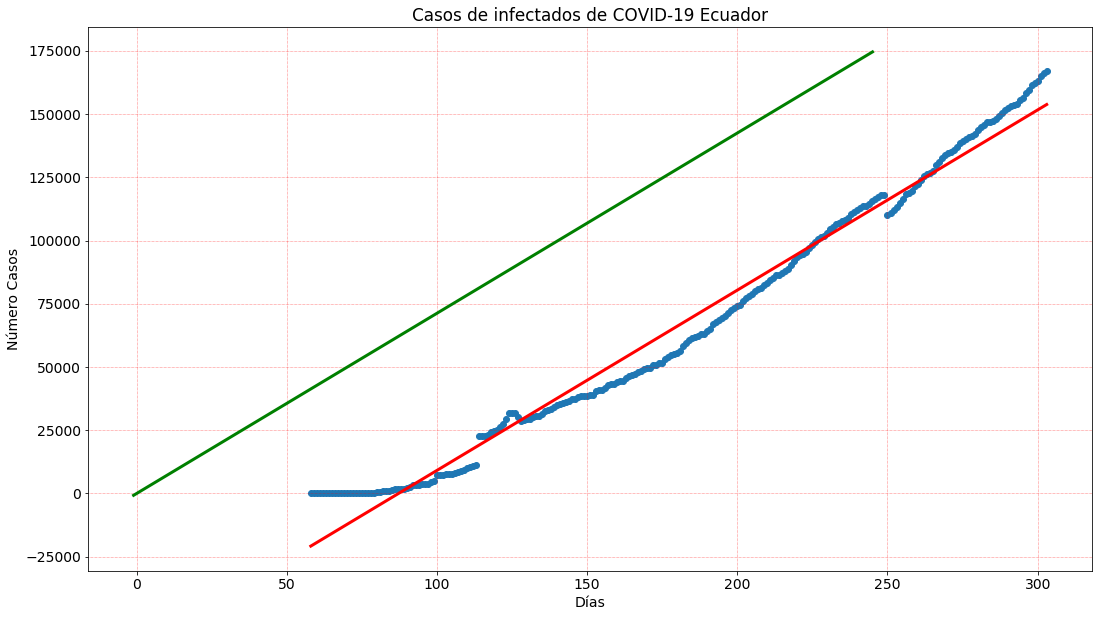

In [28]:
#Graficar
# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)#Dibujo mis puntos originales
plt.plot(x, y_pred, color='red',linewidth=3.0) #Dibujo con os valores ya predecidos.

#Bibujamos puntos reales.
x_real = np.array([-1, 245])
y_real = x_real*beta
plt.plot(x_real, y_real, color='green',linewidth=3.0)

#Propiedades
plt.title('Casos de infectados de COVID-19 Ecuador')
plt.xlabel('Días')
plt.ylabel('Número Casos')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.show()

**2)Regresión Logística**

(array([-487072.51037412,  108417.09056202]), array([[ 1.48307789e+08, -2.88127165e+07],
       [-2.88127165e+07,  5.64015956e+06]]))


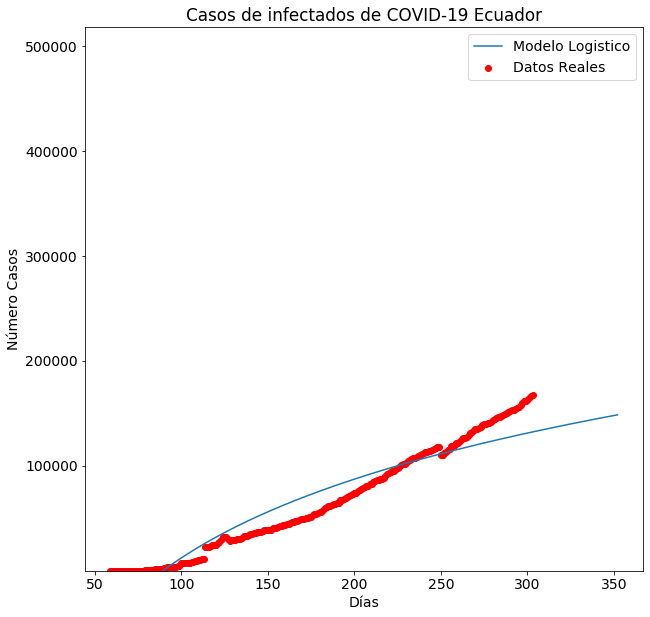

In [29]:
x = list(df.iloc [1::, 0]) # Fecha
y = list(df.iloc [1::, 1]) # Numero de casos


def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.title('Casos de infectados de COVID-19 Ecuador')
plt.xlabel("Días")
plt.ylabel("Número Casos")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

**8)Interpretación**

Desde mi punto de vista para mi si me dieran a escoger , yo escogería el modelo logístico en el caso que se trata de clasificar, pero si se tratade regresión es decir de predecir una probabilidad el modelo lineal es el mejor.
Para el caso que estamos analizando que es el caso de COVID-19 en Ecuador, el mejor modelo es el de **REGRESIÓN LINEAL**.
Como se puede evidenciar en las gráficas el que mas se apeja a la trayectoria que llevan los puntos graficados correspondiente a días y a número de casos de COVID-19 sin dudarlo es el modelo de **REGRESION LINEAL**

**9)Implementación**

Este programas es muy sencillo de entenderlo , ya que no tiene nada de complejo, culquier persona con conocimientos en python y sobre todo en regresión lo va a poder enter.

**10)Documentación**

La documentación entregada es el presente cuaderno de Jupyter.

# REFERENCIAS

https://github.com/CSSEGISandData/COVID-19

https://data.europa.eu/euodp/es/data/dataset/covid-19-coronavirus-data

http://www.gisandbeers.com/descarga-datos-de-coronavirus-actualizados-diariamente-covid19/
